In [1]:
import warnings
warnings.filterwarnings('ignore')

from wrantools.db import WMDBAdapter
from datetime import datetime, timedelta
import pandas as pd
import numpy as np

Insert your credentials

In [2]:
from wrantools.vault import get_vault_client
vault = get_vault_client()

The data is taken from the main data source of deployments, change data range

In [3]:
sql = """
select depl.* ,
       sf2.upgrade_score as "Upgrade Score"
from tableau_deployments depl
left join (select wrike_account_id,
                  created_date,
                  industry,
                  upgrade_score,
                  row_number() over
                      (partition by wrike_account_id order by created_date desc) as rank
            from derived_sf2_account
            group by 1,2,3,4) sf2
    on depl."Account Number"=sf2.wrike_account_id and sf2.rank=1
where "Bill Date" BETWEEN '2018-01-01' AND '2019-10-31'
"""
db_client = WMDBAdapter(use_pandas=True)
df = db_client.pentaho.simple_get(sql)

In [4]:
df.head()

,Bill Date,Bill Number,Account Number,Customer,Deployment ID,Deployment Name,Product,Package,Package Detailed,Remote / Onsite,...,Technical Invoice,Offset Bill Number,CSM Segment,Tier,Currency,Bookings Amount (currency),Subscription Number,Parent Deployment ID,Change Order,Upgrade Score
0,2018-11-20,INV00335377,4078,Sony Interactive Entertainment America LLC,a3S1Y000000eEOOUA2,SIE - SOW -$8k - Deployment,Consultation Services,Custom Deployment,Custom Deployment Flat Fee,Onsite,...,None,None,White Glove,Tier 1,USD,8000.0,A-S00060094,None,False,5.63
1,2018-05-01,INV00300627,4078,Sony Interactive Entertainment America LLC,a3S2A0000011EUG,SIE- Application Development Team- SOW - Deplo...,Consultation Services,Custom Deployment,Custom Deployment Flat Fee,Remote,...,None,None,White Glove,Tier 1,USD,12000.0,A-S00016993,None,False,5.63
2,2018-03-28,INV00293923,4078,Sony Interactive Entertainment America LLC,a3S2A000000VWAv,Playstation SOW - Deployment,Consultation Services,Custom Deployment,Custom Deployment Flat Fee,Remote,...,None,None,White Glove,Tier 1,USD,40700.0,A-S00016993,None,False,5.63
3,2018-03-28,INV00293922,4078,Sony Interactive Entertainment America LLC,a3S2A000000VWAv,Playstation SOW - Deployment,Consultation Services,Custom Deployment,Custom Deployment Flat Fee,Remote,...,None,None,White Glove,Tier 1,USD,52800.0,A-S00016993,None,False,5.63
4,2019-02-22,INV00353666,6743,VocaLink Limited,a3S1Y000000tb7ZUAQ,MJ-Vocalink Re-Deployment - Deployment,Consultation Services,Custom Deployment,Custom Deployment Flat Fee,Onsite,...,None,None,Premier,Tier 4,USD,4000.0,A-S00008546,None,False,4.85


In [5]:
df.dtypes

Bill Date                      object
Bill Number                    object
Account Number                  int64
Customer                       object
Deployment ID                  object
Deployment Name                object
Product                        object
Package                        object
Package Detailed               object
Remote / Onsite                object
Deployment Owner               object
Outsource / Internal           object
Deployment Consultant          object
Start Date                     object
Kick off Date                  object
End Date                       object
Original Deadline              object
Updated Deadline               object
Project Status                 object
Bookings Amount               float64
List Price                     object
Effective Price                object
Metal Bucket                   object
Region                         object
Invoice Balance               float64
SaaS Product                   object
Seats       

In [6]:
summary = df.describe(include='all')
summary = summary.transpose()
summary

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
Bill Date,3829,526,2019-06-28,37,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Bill Number,3829,3768,INV00397581,3,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Account Number,3829,NaN,NaN,NaN,2.20352e+06,570361,4078,1.94704e+06,2.2303e+06,2.59282e+06,3.23933e+06
Customer,3695,3141,,21,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Deployment ID,3826,3628,a3S2A000000VVNb,6,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Deployment Name,3818,3468,Ingersoll Rand: WFM - Deployment,7,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Product,3829,2,Consultation Services,3811,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Package,3829,12,Small,1944,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Package Detailed,3829,30,Small Deployment,1892,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Remote / Onsite,3829,2,Remote,3479,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [7]:
import pandas as pd
import numpy as np
import math as math
from sklearn.metrics import classification_report, accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import RandomForestRegressor
from catboost import CatBoostRegressor
import matplotlib

import matplotlib.pyplot as plt
from scipy import stats
matplotlib.style.use('ggplot')
%matplotlib inline

All fields where there are dates, transform to date type

In [8]:
df['Bill Date']=pd.to_datetime(df['Bill Date'])
df['Became Paid Day']=pd.to_datetime(df['Became Paid Day'])
df['Start Date']=pd.to_datetime(df['Start Date'])
df['End Date']=pd.to_datetime(df['End Date'])

Make new fields for prediction model

In [9]:
df['Age (Months)']=np.where(df['Became Paid Day']=="None",0,(df['Bill Date']-df['Became Paid Day']))
df['Age (Months)']=df['Age (Months)'] / pd.Timedelta(30, unit='d')
df['Age (Months)']=df['Age (Months)'][df['Age (Months)'].notnull()].apply(lambda x: int(x))
df['Age (Months)'].head()

0    67.0
1    60.0
2    59.0
3    59.0
4    70.0
Name: Age (Months), dtype: float64

In [10]:
import time
from datetime import date
def ifnull(var, val):
    if pd.isnull(var):
        return val
    return var
df['Today']=pd.to_datetime(date.today())
# df['Duration Days']=np.where(pd.isnull(pd.to_datetime(df['End Date'])-pd.to_datetime(df['Start Date'])), 
#                              pd.to_datetime(df['Today'])-pd.to_datetime(df['Start Date']), 
#                              pd.to_datetime(df['End Date'])-pd.to_datetime(df['Start Date']))
df['Days from Today']=np.where(pd.isnull(pd.to_datetime(df['Today'])-pd.to_datetime(df['Start Date'])), 
                              pd.to_datetime(df['Today'])-pd.to_datetime(df['Bill Date']), 
                              pd.to_datetime(df['Today'])-pd.to_datetime(df['Start Date']))
df['Duration Days']=pd.to_datetime(df['End Date'])-pd.to_datetime(df['Start Date'])
#df['Duration Days']=np.where(pd.isnull(df['Duration Days']),
#                             pd.to_datetime(df['Today'])-pd.to_datetime(df['Bill Date']),df['Duration Days'])
df['Duration Days']=df['Duration Days'] / pd.Timedelta(1, unit='d')
df['Days from Today']=df['Days from Today'] / pd.Timedelta(1, unit='d')

In [11]:
df['Package'].unique()

array(['Custom Deployment', 'Small', 'JumpStart', 'Large ', 'Integrate',
       'Medium', 'Expansion Medium', 'Expansion Small',
       'Expansion Large ', 'Custom Development',
       '26-50 User Deployment Package', 'PS Pilot'], dtype=object)

Make less deployment packages, unification of them

In [12]:
df['Package (group)']=df['Package'].replace(['Large ','Expansion Large '],'Large')
df['Package (group)']=df['Package (group)'].replace(['Medium','26-50 User Deployment Package','Expansion Medium'],'Medium')
df['Package (group)']=df['Package (group)'].replace(['Expansion Small'],'Small')
df['Package (group)'].unique()

array(['Custom Deployment', 'Small', 'JumpStart', 'Large', 'Integrate',
       'Medium', 'Custom Development', 'PS Pilot'], dtype=object)

Conditions for overdue definition

In [13]:
package_durations=df[df['Project Status'].isin(['Completed', 'Deemed Delivered'])].groupby(by=['Package (group)','Remote / Onsite'],as_index=False)['Duration Days'].median()

In [15]:
package_durations.rename(columns={'Duration Days':'Package (group) durations'},inplace=True)

In [16]:
package_durations

,Package (group),Remote / Onsite,Package (group) durations
0,Custom Deployment,Onsite,100.0
1,Custom Deployment,Remote,118.5
2,Custom Development,Onsite,92.0
3,Custom Development,Remote,63.5
4,Integrate,Onsite,133.0
5,Integrate,Remote,91.5
6,JumpStart,Onsite,91.0
7,JumpStart,Remote,45.0
8,Large,Onsite,85.0
9,Large,Remote,99.0


In [17]:
df=pd.merge(df,package_durations,how='left', on=['Package (group)','Remote / Onsite'], sort=False)

In [20]:
df['Overdue Days']=np.where(pd.isnull(df['Duration Days']),
                           df['Days from Today']-df['Package (group) durations'],
                           df['Duration Days']-df['Package (group) durations'])
df['Duration Overall']=np.where(pd.isnull(df['Duration Days']),
                                df['Days from Today'],
                                df['Duration Days'])

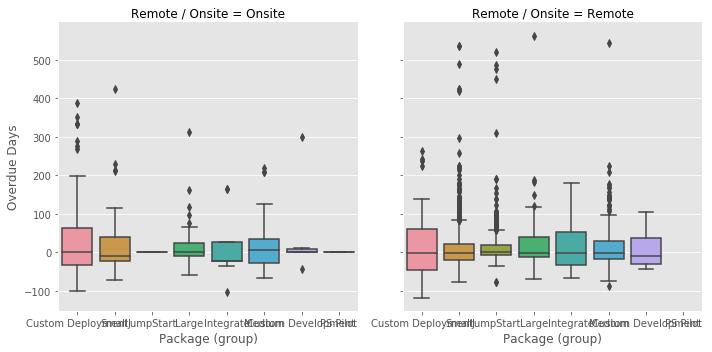

In [52]:
sns.catplot(x="Package (group)", y="Overdue Days", col="Remote / Onsite", kind="box", data=df)

In [38]:
df[df['Project Status'].isin(['Completed', 'Deemed Delivered'])].groupby(by=['Package (group)','Remote / Onsite'],as_index=False)['Overdue Days'].mean()

,Package (group),Remote / Onsite,Overdue Days
0,Custom Deployment,Onsite,18.694444
1,Custom Deployment,Remote,8.644444
2,Custom Development,Onsite,44.333333
3,Custom Development,Remote,20.666667
4,Integrate,Onsite,23.333333
5,Integrate,Remote,4.300000
6,JumpStart,Onsite,0.000000
7,JumpStart,Remote,9.986945
8,Large,Onsite,14.870968
9,Large,Remote,18.152381


In [75]:
conditions = [((df['Package (group)'] =='JumpStart') & (df['Duration Overall'] > 45))|
              ((df['Package (group)'] =='Small') & (df['Duration Overall'] > 60))|
              ((df['Package (group)'] =='Medium') & (df['Duration Overall'] > 75))|
              ((df['Package (group)'] =='Large') & (df['Duration Overall'] > 90))|
              ((df['Package (group)'] =='Custom Development') & (df['Duration Overall'] > 90))|
              ((df['Package (group)'] =='Custom Deployment') & (df['Duration Overall'] > 90))|
              ((df['Package (group)'] =='PS Pilot') & (df['Duration Overall'] > 90))|
              ((df['Package (group)'] =='Integrate') & (df['Duration Overall'] > 90))]
choices = ['T']
df['Overdue'] = np.select(conditions, choices, default='F')
df[['Package','Package (group)','Duration Overall','Duration Months','Overdue']].head()

,Package,Package (group),Duration Overall,Duration Months,Overdue
0,Custom Deployment,Custom Deployment,101.0,3,T
1,Custom Deployment,Custom Deployment,237.0,7,T
2,Custom Deployment,Custom Deployment,1.0,0,F
3,Custom Deployment,Custom Deployment,1.0,0,F
4,Custom Deployment,Custom Deployment,100.0,3,T


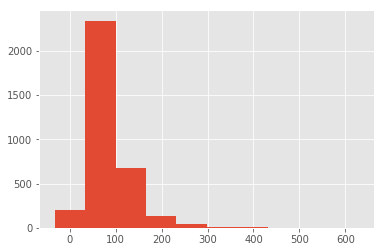

In [18]:
df['Duration Days'].hist()

In [19]:
df['Duration Days'].median()

73.0

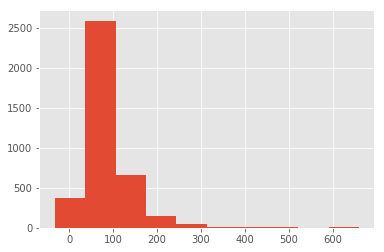

In [78]:
df['Duration Overall'].hist()

In [121]:
df[df['Duration Months']>6]['Bookings Amount'].sum()

587042.05

In [80]:
df.columns

Index(['Bill Date', 'Bill Number', 'Account Number', 'Customer',
       'Deployment ID', 'Deployment Name', 'Product', 'Package',
       'Package Detailed', 'Remote / Onsite', 'Deployment Owner',
       'Outsource / Internal', 'Deployment Consultant', 'Start Date',
       'Kick off Date', 'End Date', 'Original Deadline', 'Updated Deadline',
       'Project Status', 'Bookings Amount', 'List Price', 'Effective Price',
       'Metal Bucket', 'Region', 'Invoice Balance', 'SaaS Product', 'Seats',
       'Incremental Seats', 'Billing Period', 'MRR', 'Account Status',
       'Became Paid Day', 'NA / INTL', 'Duration Months', 'End Month',
       'Upgrade Day', 'Technical Invoice', 'Offset Bill Number', 'CSM Segment',
       'Tier', 'Currency', 'Bookings Amount (currency)', 'Subscription Number',
       'Parent Deployment ID', 'Change Order', 'Upgrade Score', 'Age (Months)',
       'Today', 'Days from Today', 'Duration Days', 'Package (group)',
       'Package (group) durations', 'Overdue Days'

In [81]:
df['Project Status'].value_counts()

Completed           3099
In Progress          308
Deemed Delivered     221
New                   75
Canceled              54
Started               37
Error                 14
On Hold                8
Cancelled              2
Name: Project Status, dtype: int64

In [289]:
df['Duration Months'].value_counts()

 1     1152
 2     1134
 3      681
 4      304
 0      207
 5      146
 6       81
 7       42
 8       28
 9       17
 16       6
 10       5
 11       5
 12       5
 14       4
 21       2
 18       2
 17       2
-1        2
 13       2
 20       2
Name: Duration Months, dtype: int64

In [82]:
df['Full Start Date'] = np.where(df['Start Date'].notnull(),
                      df['Start Date'],
                      df['Bill Date'])
df['Full Start Date'].isnull().sum()
df['Workload Month']=df['Full Start Date'].apply(lambda x:pd.date_range(start=x, periods=1, freq='M').date[0])

In [83]:
def range_date(start,periods):
    return pd.date_range(start=start, periods=periods+1, freq='M')
df['Array Busy Months']=df.apply(lambda x: range_date(x['Full Start Date'], x['Duration Months']), axis=1)
df['Array Busy Months']=df['Array Busy Months'].apply(lambda x: x.date)

In [84]:
df['Array Busy Months']=df['Array Busy Months'].apply(lambda x: x.flatten())

In [85]:
depl_list=[]
month_list=[]
for i in df.index:
    month_array = df.get_value(i,'Array Busy Months')
    depl = df.get_value(i,'Deployment Consultant')
    for month in month_array:
        depl_list.append(depl)
        month_list.append(month)

In [86]:
workload=pd.DataFrame({'Deployment Consultant':depl_list,'Workload Month':month_list})
workload.head()

,Deployment Consultant,Workload Month
0,Melanie Thong,2018-11-30
1,Melanie Thong,2018-12-31
2,Melanie Thong,2019-01-31
3,Melanie Thong,2019-02-28
4,Melanie Thong,2018-06-30


In [87]:
workload=workload.groupby(by=['Deployment Consultant','Workload Month'],as_index=False).size().reset_index(name='Workload Deployments')

In [88]:
df=pd.merge(df,workload,how='left', on=['Deployment Consultant','Workload Month'], sort=False)

In [89]:
df.columns

Index(['Bill Date', 'Bill Number', 'Account Number', 'Customer',
       'Deployment ID', 'Deployment Name', 'Product', 'Package',
       'Package Detailed', 'Remote / Onsite', 'Deployment Owner',
       'Outsource / Internal', 'Deployment Consultant', 'Start Date',
       'Kick off Date', 'End Date', 'Original Deadline', 'Updated Deadline',
       'Project Status', 'Bookings Amount', 'List Price', 'Effective Price',
       'Metal Bucket', 'Region', 'Invoice Balance', 'SaaS Product', 'Seats',
       'Incremental Seats', 'Billing Period', 'MRR', 'Account Status',
       'Became Paid Day', 'NA / INTL', 'Duration Months', 'End Month',
       'Upgrade Day', 'Technical Invoice', 'Offset Bill Number', 'CSM Segment',
       'Tier', 'Currency', 'Bookings Amount (currency)', 'Subscription Number',
       'Parent Deployment ID', 'Change Order', 'Upgrade Score', 'Age (Months)',
       'Today', 'Days from Today', 'Duration Days', 'Package (group)',
       'Package (group) durations', 'Overdue Days'

In [90]:
df.drop(['Full Start Date', 'Workload Month', 'Array Busy Months'],inplace=True,axis=1)

In [91]:
df['DR']=np.where((df['Project Status'].isin(['In Progress','New','Started','On Hold']))|(df['End Date']>df['Today']),1,0)

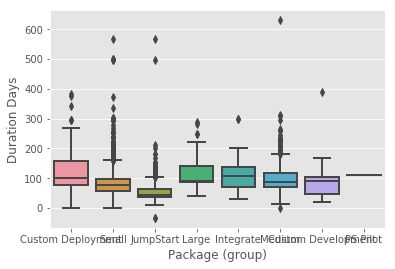

In [31]:
import seaborn as sns
sns.boxplot(x="Package (group)", y="Duration Days", data=df,linewidth=2)

In [93]:
dur_quantile95 = df.groupby(['Package (group)'])['Duration Days'].quantile(.95).reset_index(name='Duration Days (95 quantile)')
df=pd.merge(df,dur_quantile95,how='left', on=['Package (group)'], sort=False)

In [94]:
df.head()

,Bill Date,Bill Number,Account Number,Customer,Deployment ID,Deployment Name,Product,Package,Package Detailed,Remote / Onsite,...,Days from Today,Duration Days,Package (group),Package (group) durations,Overdue Days,Duration Overall,Overdue,Workload Deployments,DR,Duration Days (95 quantile)
0,2018-11-20,INV00335377,4078,Sony Interactive Entertainment America LLC,a3S1Y000000eEOOUA2,SIE - SOW -$8k - Deployment,Consultation Services,Custom Deployment,Custom Deployment Flat Fee,Onsite,...,368.0,101.0,Custom Deployment,101.0,0.0,101.0,T,14.0,0,247.0
1,2018-05-01,INV00300627,4078,Sony Interactive Entertainment America LLC,a3S2A0000011EUG,SIE- Application Development Team- SOW - Deplo...,Consultation Services,Custom Deployment,Custom Deployment Flat Fee,Remote,...,513.0,237.0,Custom Deployment,101.0,136.0,237.0,T,17.0,0,247.0
2,2018-03-28,INV00293923,4078,Sony Interactive Entertainment America LLC,a3S2A000000VWAv,Playstation SOW - Deployment,Consultation Services,Custom Deployment,Custom Deployment Flat Fee,Remote,...,851.0,1.0,Custom Deployment,101.0,-100.0,1.0,F,2.0,0,247.0
3,2018-03-28,INV00293922,4078,Sony Interactive Entertainment America LLC,a3S2A000000VWAv,Playstation SOW - Deployment,Consultation Services,Custom Deployment,Custom Deployment Flat Fee,Remote,...,851.0,1.0,Custom Deployment,101.0,-100.0,1.0,F,2.0,0,247.0
4,2019-02-22,INV00353666,6743,VocaLink Limited,a3S1Y000000tb7ZUAQ,MJ-Vocalink Re-Deployment - Deployment,Consultation Services,Custom Deployment,Custom Deployment Flat Fee,Onsite,...,268.0,100.0,Custom Deployment,101.0,-1.0,100.0,T,11.0,0,247.0


In [95]:
columns=['Bill Number','Deployment ID','Bookings Amount','Deployment Owner','Project Status',
         'Outsource / Internal','Deployment Consultant','NA / INTL','Technical Invoice','Duration Months','Age (Months)',
        'Package Detailed','Remote / Onsite','Metal Bucket','Region','SaaS Product','Seats','MRR',
         'Account Status','Tier','Overdue','CSM Segment','DR','Workload Deployments',
         'Package (group) durations','Duration Days (95 quantile)','Overdue Days', 'Duration Overall']
dfo=df[columns]
dfo.head()

,Bill Number,Deployment ID,Bookings Amount,Deployment Owner,Project Status,Outsource / Internal,Deployment Consultant,NA / INTL,Technical Invoice,Duration Months,...,Account Status,Tier,Overdue,CSM Segment,DR,Workload Deployments,Package (group) durations,Duration Days (95 quantile),Overdue Days,Duration Overall
0,INV00335377,a3S1Y000000eEOOUA2,8000.0,Internal,Completed,Internal,Melanie Thong,NA,None,3,...,Upgrade,Tier 1,T,White Glove,0,14.0,101.0,247.0,0.0,101.0
1,INV00300627,a3S2A0000011EUG,12000.0,Internal,Completed,Internal,Melanie Thong,NA,None,7,...,Upgrade,Tier 1,T,White Glove,0,17.0,101.0,247.0,136.0,237.0
2,INV00293923,a3S2A000000VWAv,40700.0,Internal,Completed,Internal,Roberto Wantland,NA,None,0,...,Upgrade,Tier 1,F,White Glove,0,2.0,101.0,247.0,-100.0,1.0
3,INV00293922,a3S2A000000VWAv,52800.0,Internal,Completed,Internal,Roberto Wantland,NA,None,0,...,Upgrade,Tier 1,F,White Glove,0,2.0,101.0,247.0,-100.0,1.0
4,INV00353666,a3S1Y000000tb7ZUAQ,4000.0,Internal,Completed,Internal,Treasa Coleman,INTL,None,3,...,Upgrade,Tier 4,T,Premier,0,11.0,101.0,247.0,-1.0,100.0


NA can be misinterpreted, so change it to North America

In [96]:
dfo['NA / INTL']=dfo['NA / INTL'].replace('NA','North America')
dfo['NA / INTL'].unique().tolist()

['North America', 'INTL', None]

In [97]:
df['Project Status'].unique()

array(['Completed', 'Deemed Delivered', 'Error', 'Started', 'In Progress',
       'Canceled', 'New', None, 'On Hold', 'Cancelled'], dtype=object)

Filter technical invoices and error deployments

In [98]:
dfo=dfo[dfo['Technical Invoice']!=True]
dfo=dfo[dfo['Project Status'].isin(['Error','Canceled','Cancelled']) == False]
dfo.head()

,Bill Number,Deployment ID,Bookings Amount,Deployment Owner,Project Status,Outsource / Internal,Deployment Consultant,NA / INTL,Technical Invoice,Duration Months,...,Account Status,Tier,Overdue,CSM Segment,DR,Workload Deployments,Package (group) durations,Duration Days (95 quantile),Overdue Days,Duration Overall
0,INV00335377,a3S1Y000000eEOOUA2,8000.0,Internal,Completed,Internal,Melanie Thong,North America,None,3,...,Upgrade,Tier 1,T,White Glove,0,14.0,101.0,247.0,0.0,101.0
1,INV00300627,a3S2A0000011EUG,12000.0,Internal,Completed,Internal,Melanie Thong,North America,None,7,...,Upgrade,Tier 1,T,White Glove,0,17.0,101.0,247.0,136.0,237.0
2,INV00293923,a3S2A000000VWAv,40700.0,Internal,Completed,Internal,Roberto Wantland,North America,None,0,...,Upgrade,Tier 1,F,White Glove,0,2.0,101.0,247.0,-100.0,1.0
3,INV00293922,a3S2A000000VWAv,52800.0,Internal,Completed,Internal,Roberto Wantland,North America,None,0,...,Upgrade,Tier 1,F,White Glove,0,2.0,101.0,247.0,-100.0,1.0
4,INV00353666,a3S1Y000000tb7ZUAQ,4000.0,Internal,Completed,Internal,Treasa Coleman,INTL,None,3,...,Upgrade,Tier 4,T,Premier,0,11.0,101.0,247.0,-1.0,100.0


In [99]:
dfo=dfo.drop(columns=['Technical Invoice','Metal Bucket'])

In [100]:
dfo.isnull().sum()

Bill Number                     0
Deployment ID                   2
Bookings Amount                 0
Deployment Owner                4
Project Status                  4
Outsource / Internal            4
Deployment Consultant          17
NA / INTL                       4
Duration Months                 0
Age (Months)                   14
Package Detailed                0
Remote / Onsite                 0
Region                          4
SaaS Product                   13
Seats                          13
MRR                            13
Account Status                 13
Tier                           14
Overdue                         0
CSM Segment                    13
DR                              0
Workload Deployments           17
Package (group) durations       0
Duration Days (95 quantile)     0
Overdue Days                    0
Duration Overall                0
dtype: int64

In [102]:
dfo.head()

,Bill Number,Deployment ID,Bookings Amount,Deployment Owner,Project Status,Outsource / Internal,Deployment Consultant,NA / INTL,Duration Months,Age (Months),...,Account Status,Tier,Overdue,CSM Segment,DR,Workload Deployments,Package (group) durations,Duration Days (95 quantile),Overdue Days,Duration Overall
0,INV00335377,a3S1Y000000eEOOUA2,8000.0,Internal,Completed,Internal,Melanie Thong,North America,3,67.0,...,Upgrade,Tier 1,T,White Glove,0,14.0,101.0,247.0,0.0,101.0
1,INV00300627,a3S2A0000011EUG,12000.0,Internal,Completed,Internal,Melanie Thong,North America,7,60.0,...,Upgrade,Tier 1,T,White Glove,0,17.0,101.0,247.0,136.0,237.0
2,INV00293923,a3S2A000000VWAv,40700.0,Internal,Completed,Internal,Roberto Wantland,North America,0,59.0,...,Upgrade,Tier 1,F,White Glove,0,2.0,101.0,247.0,-100.0,1.0
3,INV00293922,a3S2A000000VWAv,52800.0,Internal,Completed,Internal,Roberto Wantland,North America,0,59.0,...,Upgrade,Tier 1,F,White Glove,0,2.0,101.0,247.0,-100.0,1.0
4,INV00353666,a3S1Y000000tb7ZUAQ,4000.0,Internal,Completed,Internal,Treasa Coleman,INTL,3,70.0,...,Upgrade,Tier 4,T,Premier,0,11.0,101.0,247.0,-1.0,100.0


In [103]:
dfo[dfo['Bill Number']=='INV00366333'].T

,2935
Bill Number,INV00366333
Deployment ID,a3S1Y000000QDqIUAW
Bookings Amount,2250
Deployment Owner,Internal
Project Status,In Progress
Outsource / Internal,Internal
Deployment Consultant,Jorge Rojas
NA / INTL,North America
Duration Months,6
Age (Months),0


For train drop deployments that are completed, but for test check on the completed deployments
Sekect only objects columns and drop Bill Number and Deployment ID for model training
Encode all objects values, because classifier doesn't recognize dtype objects

In [104]:
dfo[dfo['Project Status'].isin(['Completed', 'Deemed Delivered'])].isnull().sum()

Bill Number                     0
Deployment ID                   0
Bookings Amount                 0
Deployment Owner                0
Project Status                  0
Outsource / Internal            0
Deployment Consultant          12
NA / INTL                       0
Duration Months                 0
Age (Months)                   10
Package Detailed                0
Remote / Onsite                 0
Region                          0
SaaS Product                   10
Seats                          10
MRR                            10
Account Status                 10
Tier                           10
Overdue                         0
CSM Segment                    10
DR                              0
Workload Deployments           12
Package (group) durations       0
Duration Days (95 quantile)     0
Overdue Days                    0
Duration Overall                0
dtype: int64

In [105]:
dfo[dfo['Project Status'].isin(['Completed', 'Deemed Delivered']) == False].isnull().sum()

Bill Number                    0
Deployment ID                  2
Bookings Amount                0
Deployment Owner               4
Project Status                 4
Outsource / Internal           4
Deployment Consultant          5
NA / INTL                      4
Duration Months                0
Age (Months)                   4
Package Detailed               0
Remote / Onsite                0
Region                         4
SaaS Product                   3
Seats                          3
MRR                            3
Account Status                 3
Tier                           4
Overdue                        0
CSM Segment                    3
DR                             0
Workload Deployments           5
Package (group) durations      0
Duration Days (95 quantile)    0
Overdue Days                   0
Duration Overall               0
dtype: int64

In [185]:
from sklearn.preprocessing import LabelEncoder
traindf=dfo[(dfo['Project Status'].isin(['Completed', 'Deemed Delivered']))&(df['Duration Months']<=6)].dropna()
#traindf=traindf[traindf['Duration Overall']<traindf['Duration Days (95 quantile)']]
testdf=dfo[dfo['Project Status'].isin(['Completed', 'Deemed Delivered']) == False].dropna()
enc = LabelEncoder()
obj_test = testdf.select_dtypes(include=['object']).copy()
obj_test = obj_test.drop(columns=['Bill Number','Deployment ID','NA / INTL','Region',
                                  'Outsource / Internal','Remote / Onsite','CSM Segment','Package Detailed',
                                  'Deployment Owner','Project Status'])

obj_test = obj_test.apply(lambda col: enc.fit_transform(col))
df_test=pd.concat([testdf[['Bill Number','Deployment ID','Bookings Amount','Overdue Days',
                           'Seats','MRR','Workload Deployments','Package (group) durations']].dropna(),obj_test],axis=1)
obj_train = traindf.select_dtypes(include=['object']).copy()
obj_train = obj_train.drop(columns=['Bill Number','Deployment ID','NA / INTL','Region',
                                  'Outsource / Internal','Remote / Onsite','CSM Segment','Package Detailed',
                                   'Deployment Owner','Project Status'])
obj_train = obj_train.apply(lambda col: enc.fit_transform(col))
df_train=pd.concat([traindf[['Bill Number','Deployment ID','Bookings Amount','Duration Months','Overdue Days',
                             'Seats','MRR','Workload Deployments','Package (group) durations']].dropna(),obj_train],axis=1)

In [180]:
len(traindf)

3021

In [186]:
df_train.columns

Index(['Bill Number', 'Deployment ID', 'Bookings Amount', 'Duration Months',
       'Overdue Days', 'Seats', 'MRR', 'Workload Deployments',
       'Package (group) durations', 'Deployment Consultant', 'SaaS Product',
       'Account Status', 'Tier', 'Overdue'],
      dtype='object')

In [188]:
from sklearn.model_selection import train_test_split
feature_cols=['Bill Number','Deployment ID','Bookings Amount',
              'Deployment Consultant','Package (group) durations',
              'Overdue','Workload Deployments','Overdue Days',
             'SaaS Product','Seats','MRR','Account Status','Tier']
data_inputs = df_train[feature_cols]
expected_output = df_train[['Duration Months']].replace(0,0.01).astype(str)
inputs_train, inputs_test, expected_output_train, expected_output_test = train_test_split(data_inputs, expected_output, test_size=0.1, random_state=42)
inputs_train.head()

,Bill Number,Deployment ID,Bookings Amount,Deployment Consultant,Package (group) durations,Overdue,Workload Deployments,Overdue Days,SaaS Product,Seats,MRR,Account Status,Tier
1387,INV00301812,a3S2A0000011DsRUAU,2000.0,64,77.0,1,48.0,59.0,0,15.0,372.0,2,3
3215,INV00383949,a3S1Y000000mTerUAE,2000.0,7,77.0,1,39.0,-7.0,0,25.0,527.0,5,2
2903,INV00365139,a3S1Y000000QDgmUAG,2500.0,58,77.0,1,12.0,-15.0,0,20.0,396.8,2,2
1494,INV00329997,a3S1Y000000eDypUAE,2880.0,66,87.0,1,17.0,42.0,0,50.0,892.8,5,2
231,INV00290326,a3S2A0000007MYH,6300.0,1,90.0,1,1.0,91.0,4,75.0,3237.5,5,1


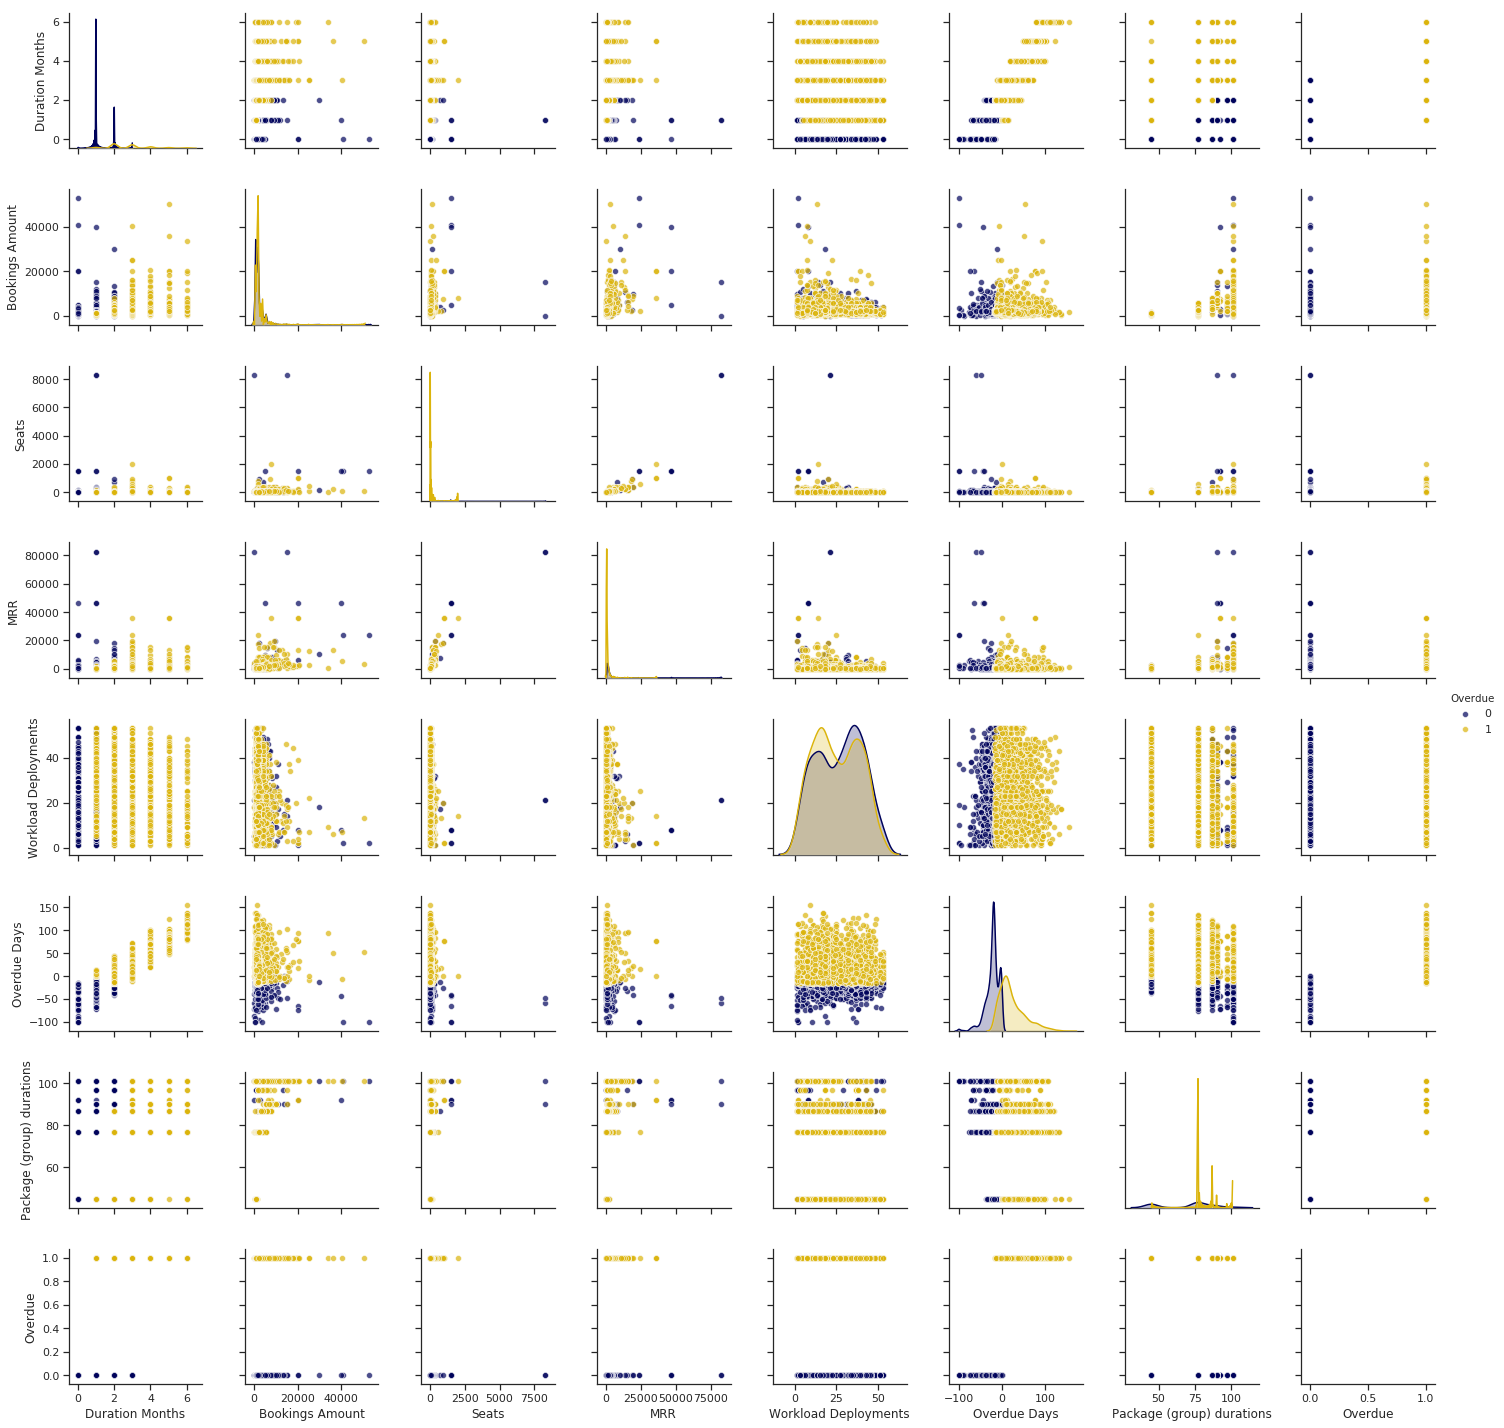

In [189]:
sns.set(style="ticks", color_codes=True);
palette = sns.xkcd_palette(['dark blue', 'gold', 'orange'])
sns.pairplot(df_train[['Duration Months','Bookings Amount', 
                      'Seats', 'MRR', 'Workload Deployments','Overdue Days',
                      'Package (group) durations','Overdue']], hue = 'Overdue', diag_kind = 'kde', palette= palette, plot_kws=dict(alpha = 0.7),
                   diag_kws=dict(shade=True))

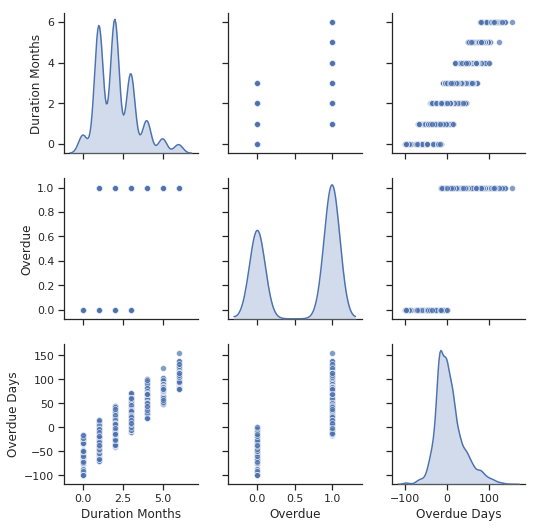

In [175]:
sns.set(style="ticks", color_codes=True);
palette = sns.xkcd_palette(['dark blue', 'gold', 'orange'])
sns.pairplot(df_train[['Duration Months','Overdue','Overdue Days']], diag_kind = 'kde', palette= palette, plot_kws=dict(alpha = 0.7),
                   diag_kws=dict(shade=True))

In [83]:
from sklearn.linear_model import LinearRegression
from sklearn import metrics

In [84]:
regressor = LinearRegression()  
X=inputs_train[['Duration Overall','Overdue']]
regressor.fit(X, expected_output_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [85]:
print(regressor.intercept_)

[-62.52959319]


In [86]:
coeff_df = pd.DataFrame(regressor.coef_.T, X.columns, columns=['Coefficient'])  
coeff_df

,Coefficient
Duration Overall,0.845257
Overdue,4.577972


In [87]:
X_test=inputs_test[['Duration Overall','Overdue']]
y_pred = regressor.predict(X_test)

In [88]:
metrics.mean_absolute_error(np.array(expected_output_test.iloc[:,0]),y_pred)

13.019205796772573

In [89]:
from sklearn.metrics import mean_squared_error, r2_score
rmse = (np.sqrt(mean_squared_error(np.array(expected_output_train), regressor.predict(X))))
r2 = r2_score(np.array(expected_output_train), regressor.predict(X))

print("The model performance for training set")
print("--------------------------------------")
print('RMSE is {}'.format(rmse))
print('R2 score is {}'.format(r2))
print("\n")

# model evaluation for testing set
rmse = (np.sqrt(mean_squared_error(np.array(expected_output_test.iloc[:,0]), y_pred)))
r2 = r2_score(np.array(expected_output_test.iloc[:,0]), y_pred)

print("The model performance for testing set")
print("--------------------------------------")
print('RMSE is {}'.format(rmse))
print('R2 score is {}'.format(r2))

The model performance for training set
--------------------------------------
RMSE is 15.084926151963685
R2 score is 0.8889189275468089


The model performance for testing set
--------------------------------------
RMSE is 15.854210307069087
R2 score is 0.853898751512133


In [90]:
df['Overdue'].replace({'T':1,'F':0},inplace=True)

In [91]:
predict_reg=regressor.predict(df[['Duration Overall','Overdue']]).astype('int')
predict_reg=pd.DataFrame(predict_reg,columns=['Overdue Days Predict'])
final=pd.concat([df.reset_index(drop=True),predict_reg], axis=1)

In [92]:
final.columns

Index(['Bill Date', 'Bill Number', 'Account Number', 'Customer',
       'Deployment ID', 'Deployment Name', 'Product', 'Package',
       'Package Detailed', 'Remote / Onsite', 'Deployment Owner',
       'Outsource / Internal', 'Deployment Consultant', 'Start Date',
       'Kick off Date', 'End Date', 'Original Deadline', 'Updated Deadline',
       'Project Status', 'Bookings Amount', 'List Price', 'Effective Price',
       'Metal Bucket', 'Region', 'Invoice Balance', 'SaaS Product', 'Seats',
       'Incremental Seats', 'Billing Period', 'MRR', 'Account Status',
       'Became Paid Day', 'NA / INTL', 'Duration Months', 'End Month',
       'Upgrade Day', 'Technical Invoice', 'Offset Bill Number', 'CSM Segment',
       'Tier', 'Currency', 'Bookings Amount (currency)', 'Subscription Number',
       'Account Industry', 'Upgrade Score', 'Age (Months)', 'Today',
       'Days from Today', 'Duration Days', 'Package (group)',
       'Package (group) durations', 'Overdue Days', 'Duration Overall'

In [93]:
from datetime import timedelta
def add_days(date, days):
    return date + timedelta(days=days)
final['Predict End Date']=final.apply(lambda x: add_days(x['Start Date'], x['Package (group) durations']), axis=1)
final['Predict End Date']=final.apply(lambda x: add_days(x['Predict End Date'], x['Overdue Days Predict']), axis=1)
#final['Overdue Days']

In [94]:
final.head()

,Bill Date,Bill Number,Account Number,Customer,Deployment ID,Deployment Name,Product,Package,Package Detailed,Remote / Onsite,...,Package (group),Package (group) durations,Overdue Days,Duration Overall,Overdue,Workload Deployments,DR,Duration Days (95 quantile),Overdue Days Predict,Predict End Date
0,2018-11-20,INV00335377,4078,Sony Interactive Entertainment (Playstation),a3S1Y000000eEOOUA2,SIE - SOW -$8k - Deployment,Consultation Services,Custom Deployment,Custom Deployment Flat Fee,Onsite,...,Custom Deployment,100.0,1.0,101.0,1,14.0,0,247.0,27,2019-03-26
1,2018-05-01,INV00300627,4078,Sony Interactive Entertainment (Playstation),a3S2A0000011EUG,SIE- Application Development Team- SOW - Deplo...,Consultation Services,Custom Deployment,Custom Deployment Flat Fee,Remote,...,Custom Deployment,100.0,137.0,237.0,1,17.0,0,247.0,142,2019-02-24
2,2018-03-28,INV00293923,4078,Sony Interactive Entertainment (Playstation),a3S2A000000VWAv,Playstation SOW - Deployment,Consultation Services,Custom Deployment,Custom Deployment Flat Fee,Remote,...,Custom Deployment,100.0,-99.0,1.0,0,2.0,0,247.0,-61,2017-09-01
3,2018-03-28,INV00293922,4078,Sony Interactive Entertainment (Playstation),a3S2A000000VWAv,Playstation SOW - Deployment,Consultation Services,Custom Deployment,Custom Deployment Flat Fee,Remote,...,Custom Deployment,100.0,-99.0,1.0,0,2.0,0,247.0,-61,2017-09-01
4,2019-02-22,INV00353666,6743,MasterCard,a3S1Y000000tb7ZUAQ,MJ-Vocalink Re-Deployment - Deployment,Consultation Services,Custom Deployment,Custom Deployment Flat Fee,Onsite,...,Custom Deployment,100.0,0.0,100.0,1,11.0,0,247.0,26,2019-07-03


In [95]:
final['Predict Month']=final['Predict End Date'].apply(lambda x:x.replace(day=1))

In [96]:
final_not_close=final[final['Project Status'].isin(['Completed', 'Deemed Delivered']) == False]

In [105]:
final_not_close['Bookings Amount'].sum()

1575027.346

In [123]:
predicted_revenue=final_not_close.pivot(columns='Predict Month', values='Bookings Amount').sum()

In [124]:
predicted_revenue

Predict Month
NaT                      2723.300
2017-02-01 00:00:00      1620.000
2017-04-01 00:00:00     -1000.000
2017-06-01 00:00:00     -3000.000
2017-07-01 00:00:00      -800.000
2017-10-01 00:00:00     -1000.000
2017-11-01 00:00:00     -5000.000
2018-03-01 00:00:00     15000.000
2018-04-01 00:00:00      5000.000
2018-05-01 00:00:00      4000.000
2018-07-01 00:00:00         0.000
2018-08-01 00:00:00         0.000
2018-09-01 00:00:00      2000.000
2018-10-01 00:00:00      1600.000
2019-01-01 00:00:00     -1800.000
2019-03-01 00:00:00         0.000
2019-04-01 00:00:00      6000.000
2019-05-01 00:00:00       800.000
2019-06-01 00:00:00     11230.000
2019-06-01 12:00:00     30000.000
2019-07-01 00:00:00     18500.000
2019-08-01 00:00:00     -1000.000
2019-09-01 00:00:00      1800.000
2019-10-01 00:00:00     87743.750
2019-11-01 00:00:00    551468.296
2019-11-01 12:00:00     24500.000
2019-12-01 00:00:00    623972.000
2019-12-01 12:00:00    199420.000
2020-01-01 12:00:00      1250.000


In [125]:
pd.DataFrame(predicted_revenue, columns = ['DR'])

,DR
Predict Month,
NaT,2723.300
2017-02-01 00:00:00,1620.000
2017-04-01 00:00:00,-1000.000
2017-06-01 00:00:00,-3000.000
2017-07-01 00:00:00,-800.000
2017-10-01 00:00:00,-1000.000
2017-11-01 00:00:00,-5000.000
2018-03-01 00:00:00,15000.000
2018-04-01 00:00:00,5000.000


In [954]:
len(df_test.head().columns)

14

In [955]:
len(df_train.head().columns)

15

In [176]:
from sklearn.model_selection import RandomizedSearchCV
# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 200, stop = 2000, num = 10)]
# Number of features to consider at every split
max_features = ['auto', 'sqrt','log2']
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(10, 110, num = 11)]
max_depth.append(None)
# Minimum number of samples required to split a node
min_samples_split = [5, 10, 15]
# Minimum number of samples required at each leaf node
min_samples_leaf = [4, 6, 8, 10]
# Method of selecting samples for training each tree
bootstrap = [True, False]
# Create the random grid
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}
print(random_grid)

{'n_estimators': [200, 400, 600, 800, 1000, 1200, 1400, 1600, 1800, 2000], 'max_features': ['auto', 'sqrt', 'log2'], 'max_depth': [10, 20, 30, 40, 50, 60, 70, 80, 90, 100, 110, None], 'min_samples_split': [5, 10, 15], 'min_samples_leaf': [4, 6, 8, 10], 'bootstrap': [True, False]}


In [190]:
# Use the random grid to search for best hyperparameters

rf = RandomForestClassifier()
# Random search of parameters, using 3 fold cross validation, 
# search across 100 different combinations, and use all available cores
rf_random = RandomizedSearchCV(estimator = rf, param_distributions = random_grid, n_iter = 100, cv = 5, verbose=2, random_state=42, n_jobs = -1)
# Fit the random search model
rf_random.fit(inputs_train.drop(columns=['Bill Number','Deployment ID']), expected_output_train)

Fitting 5 folds for each of 100 candidates, totalling 500 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 24 concurrent workers.
[Parallel(n_jobs=-1)]: Done 114 tasks      | elapsed:   42.9s
[Parallel(n_jobs=-1)]: Done 317 tasks      | elapsed:  1.8min
[Parallel(n_jobs=-1)]: Done 500 out of 500 | elapsed:  2.7min finished


RandomizedSearchCV(cv=5, error_score='raise-deprecating',
          estimator=RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators='warn', n_jobs=None,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False),
          fit_params=None, iid='warn', n_iter=100, n_jobs=-1,
          param_distributions={'n_estimators': [200, 400, 600, 800, 1000, 1200, 1400, 1600, 1800, 2000], 'max_features': ['auto', 'sqrt', 'log2'], 'max_depth': [10, 20, 30, 40, 50, 60, 70, 80, 90, 100, 110, None], 'min_samples_split': [5, 10, 15], 'min_samples_leaf': [4, 6, 8, 10], 'bootstrap': [True, False]},
          pre_dispatch='2*n_jobs', random_state=42, refit=True,
          return_train_score='warn', scoring=None, verb

In [191]:
rf_random.best_params_

{'n_estimators': 600,
 'min_samples_split': 5,
 'min_samples_leaf': 4,
 'max_features': 'sqrt',
 'max_depth': 70,
 'bootstrap': False}

In [195]:
from sklearn import metrics
def evaluate(model, test_features, test_labels):
    predictions = model.predict(test_features)
    accuracy = metrics.accuracy_score(test_labels, predictions)
    print('Model Performance')
    print('Accuracy = {:0.2f}%.'.format(accuracy))
    return accuracy

base_model = RandomForestClassifier(n_estimators = 10, random_state = 42)
base_model.fit(inputs_train.drop(columns=['Bill Number','Deployment ID']), 
               expected_output_train)
base_accuracy = evaluate(base_model, inputs_test.drop(columns=['Bill Number','Deployment ID']), expected_output_test.iloc[:,0])

Model Performance
Accuracy = 0.97%.


In [196]:
best_random = rf_random.best_estimator_
random_accuracy = evaluate(best_random, inputs_test.drop(columns=['Bill Number','Deployment ID']), expected_output_test.replace(0,0.01).iloc[:,0])

Model Performance
Accuracy = 0.98%.


In [197]:
print('Improvement of {:0.2f}%.'.format( 100 * (random_accuracy - base_accuracy) / base_accuracy))

Improvement of 1.02%.


In [938]:
from sklearn.model_selection import GridSearchCV
# Create the parameter grid based on the results of random search 
param_grid = {
    'bootstrap': [True],
    'max_depth': [5,10,20,30],
    'max_features': ['auto'],
    'min_samples_leaf': [2, 3, 4],
    'min_samples_split': [3, 5, 7],
    'n_estimators': [50, 100, 200]
}
# Create a based model
rf = RandomForestClassifier()
# Instantiate the grid search model
grid_search = GridSearchCV(estimator = rf, param_grid = param_grid, 
                          cv = 5, n_jobs = -1, verbose = 2)

1 x 4 x 1 x 3 x 3 x 4 = 144 combonations for 3-folds

In [939]:
grid_search.fit(inputs_train.drop(columns=['Bill Number','Deployment ID']), expected_output_train)

Fitting 5 folds for each of 108 candidates, totalling 540 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 24 concurrent workers.
[Parallel(n_jobs=-1)]: Done 114 tasks      | elapsed:    7.8s
[Parallel(n_jobs=-1)]: Done 317 tasks      | elapsed:   17.4s
[Parallel(n_jobs=-1)]: Done 540 out of 540 | elapsed:   28.8s finished
/opt/3rd/python/3/lib/python3.6/site-packages/sklearn/model_selection/_search.py:740: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.best_estimator_.fit(X, y, **fit_params)


GridSearchCV(cv=5, error_score='raise-deprecating',
       estimator=RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators='warn', n_jobs=None,
           oob_score=False, random_state=None, verbose=0, warm_start=False),
       fit_params=None, iid='warn', n_jobs=-1,
       param_grid={'bootstrap': [True], 'max_depth': [5, 10, 20, 30], 'max_features': ['auto'], 'min_samples_leaf': [2, 3, 4], 'min_samples_split': [3, 5, 7], 'n_estimators': [50, 100, 200]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=2)

In [940]:
grid_search.best_params_

{'bootstrap': True,
 'max_depth': 30,
 'max_features': 'auto',
 'min_samples_leaf': 2,
 'min_samples_split': 3,
 'n_estimators': 100}

In [941]:
best_grid = grid_search.best_estimator_
grid_accuracy = evaluate(best_grid, inputs_test.drop(columns=['Bill Number','Deployment ID']), expected_output_test.replace(0,0.01).iloc[:,0])

Model Performance
Average Error: 0.9436 days.
Accuracy = -134.13%.


In [198]:
rf = RandomForestClassifier(n_estimators=500,min_samples_split=10,max_features='sqrt',
                            min_samples_leaf=5, max_depth=30, bootstrap=True, random_state=42)
rf.fit(inputs_train.drop(columns=['Bill Number','Deployment ID']), expected_output_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=30, max_features='sqrt', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=5, min_samples_split=10,
            min_weight_fraction_leaf=0.0, n_estimators=500, n_jobs=None,
            oob_score=False, random_state=42, verbose=0, warm_start=False)

In [200]:
acc = metrics.accuracy_score(expected_output_test.iloc[:,0], rf.predict(inputs_test.drop(columns=['Bill Number','Deployment ID'])))
print("Accuracy = {:.2f}%".format(acc*100))

Accuracy = 96.04%


In [225]:
predict=pd.DataFrame(rf.predict_proba(df_test.drop(columns=['Bill Number','Deployment ID'])))

In [226]:
final_pred=pd.concat([df_test.reset_index(drop=True),predict], axis=1)

In [227]:
final_pred.columns

Index([              'Bill Number',             'Deployment ID',
                 'Bookings Amount',              'Overdue Days',
                           'Seats',                       'MRR',
            'Workload Deployments', 'Package (group) durations',
           'Deployment Consultant',              'SaaS Product',
                  'Account Status',                      'Tier',
                         'Overdue',                           0,
                                 1,                           2,
                                 3,                           4,
                                 5,                           6],
      dtype='object')

In [249]:
for i in range(1,7):
    final_pred[str(i)+'_pred']=final_pred.loc[:,i]*final_pred['Bookings Amount']

In [263]:
final_pred

,Bill Number,Deployment ID,Bookings Amount,Overdue Days,Seats,MRR,Workload Deployments,Package (group) durations,Deployment Consultant,SaaS Product,...,3,4,5,6,1_pred,2_pred,3_pred,4_pred,5_pred,6_pred
0,INV00362902,a3S1Y000000QDb8UAG,7000.0,118.0,40.0,850.500,15.0,101.0,39,1,...,0.252664,0.199259,0.151766,0.179787,193.073654,1285.508414,1768.646604,1394.816225,1062.360681,1258.509069
1,INV00375885,a3S1Y000000eFToUAM,5200.0,210.0,100.0,2000.000,16.0,87.0,45,1,...,0.140473,0.207990,0.309200,0.316664,42.377193,87.158740,730.459092,1081.548451,1607.839279,1646.655340
2,INV00370213,a3S1Y000000QE6SUAW,8100.0,88.0,60.0,2402.400,9.0,97.0,26,0,...,0.273241,0.201332,0.153064,0.176924,202.746425,1352.783862,2213.254570,1630.788958,1239.815811,1433.087321
3,INV00357605,a3S1Y000000tbMUUAY,4000.0,165.0,50.0,1291.667,43.0,87.0,44,1,...,0.269601,0.217428,0.210933,0.086408,95.516603,758.754859,1078.402069,869.710120,843.732286,345.630095
4,INV00393454,a3S1Y000000mUOyUAM,2000.0,-19.0,20.0,600.000,14.0,77.0,36,3,...,0.341516,0.188095,0.194818,0.102246,55.933472,288.690511,683.032291,376.190946,389.635509,204.491297
5,INV00398553,a3S1Y000000mUtwUAE,5600.0,-60.0,80.0,2880.000,8.0,90.0,14,0,...,0.170121,0.254722,0.340219,0.190141,62.199104,188.663040,952.679215,1426.440983,1905.228990,1064.788668
6,INV00391705,a3S1Y000000mUHEUA2,2000.0,-9.0,10.0,248.000,29.0,77.0,11,0,...,0.330205,0.220103,0.174775,0.073898,51.543230,349.039144,660.409686,440.206344,349.550368,147.796682
7,INV00366329,a3S1Y000000QDpKUAW,2500.0,129.0,15.0,300.000,1.0,77.0,28,1,...,0.317724,0.204102,0.170228,0.103677,70.619070,433.571246,794.310909,510.255294,425.569371,259.191966
8,INV00384542,a3S1Y000000mThqUAE,2000.0,10.0,150.0,4950.000,6.0,97.0,24,1,...,0.185475,0.204180,0.269603,0.307901,10.143468,53.758146,370.949271,408.360741,539.206208,615.801947
9,INV00399836,a3S1Y000000mV0dUAE,800.0,-22.0,10.0,368.000,34.0,45.0,13,0,...,0.520022,0.098954,0.028154,0.023032,34.373596,229.190354,416.017935,79.162878,22.522837,18.425733


In [250]:
final_pred['Bookings Amount'].sum()

1854393.5395097

In [264]:
final_pred[final_pred['Overdue Days']>180]

,Bill Number,Deployment ID,Bookings Amount,Overdue Days,Seats,MRR,Workload Deployments,Package (group) durations,Deployment Consultant,SaaS Product,...,3,4,5,6,1_pred,2_pred,3_pred,4_pred,5_pred,6_pred
1,INV00375885,a3S1Y000000eFToUAM,5200.00,210.0,100.0,2000.000,16.0,87.0,45,1,...,0.140473,0.207990,0.309200,0.316664,42.377193,87.158740,730.459092,1081.548451,1607.839279,1646.655340
10,INV00351053,a3S1Y000000HV9EUAW,3600.00,207.0,30.0,701.595,15.0,77.0,34,1,...,0.279067,0.184503,0.209105,0.113131,84.275022,666.310041,1004.641290,664.211771,752.779241,407.270168
37,INV00313896,a3S1Y000000eCbJ,5000.00,385.0,200.0,6000.000,4.0,101.0,27,1,...,0.147756,0.198078,0.242166,0.382147,27.658120,117.792810,738.781845,990.392449,1210.831169,1910.734082
41,INV00344132,a3S1Y000000eDPxUAM,306.25,329.0,375.0,8662.500,22.0,101.0,22,4,...,0.255625,0.224964,0.196664,0.205468,4.770806,30.267588,78.285069,68.895372,60.228244,62.924555
42,INV00334785,a3S1Y000000eDPxUAM,612.50,329.0,375.0,8662.500,22.0,101.0,22,4,...,0.255413,0.223431,0.196460,0.205338,8.968884,62.692225,156.440381,136.851578,120.331514,125.769798
43,INV00328239,a3S1Y000000eDPx,875.00,329.0,375.0,8662.500,22.0,101.0,22,4,...,0.259210,0.225442,0.196139,0.198907,11.989566,90.566549,226.808359,197.262077,171.621665,174.043450
46,INV00330428,a3S1Y000000eE2SUAU,8300.00,305.0,30.0,675.000,24.0,90.0,39,3,...,0.260275,0.210308,0.190242,0.127631,193.934809,1539.211937,2160.281642,1745.553306,1579.011679,1059.337327
60,INV00351665,a3S1Y000000HVByUAO,6000.00,204.0,50.0,1800.000,15.0,77.0,34,1,...,0.267921,0.194730,0.192568,0.128257,165.491703,1101.864354,1607.525660,1168.381223,1155.405561,769.544052
61,INV00336788,a3S1Y000000eEWDUA2,5200.00,257.0,500.0,29600.000,6.0,101.0,27,1,...,0.144917,0.205156,0.240576,0.381759,32.664444,106.851997,753.568173,1066.810662,1250.997364,1985.145455
63,INV00348704,a3S1Y000000eFZhUAM,8100.00,194.0,350.0,7250.000,21.0,101.0,29,1,...,0.140818,0.207951,0.247804,0.377492,56.239199,147.670626,1140.625639,1684.400984,2007.210742,3057.681382


In [269]:
final_pred=final_pred.merge(df[['Bill Number','Deployment ID','Bookings Amount','Start Date','Bill Date']],how='left', on=['Bill Number','Deployment ID','Bookings Amount'])

In [275]:
from datetime import timedelta
def add_month(date, month):
    date = date.replace(day=1)
    date = date + month*timedelta(days=32)
    date = date.replace(day=1)
    return date
final_pred['Full Start Date'] = np.where(final_pred['Start Date'].notnull(),
                      final_pred['Start Date'],
                      final_pred['Bill Date'])
final_pred['Next Month']=final_pred.apply(lambda x: add_month(x['Full Start Date'], 1), axis=1)

In [288]:
final_pred.groupby(['Next Month'])['1_pred'].sum()

Next Month
2018-08-01      27.658120
2018-09-01     179.497995
2018-10-01      25.729256
2018-11-01     219.370706
2018-12-01     309.017201
2019-01-01      57.207998
2019-02-01      98.616392
2019-03-01     733.806118
2019-04-01     211.983560
2019-05-01    1646.298234
2019-06-01    2336.609557
2019-07-01    2513.916690
2019-08-01    2465.989737
2019-09-01    5131.533447
2019-10-01    8015.467170
2019-11-01    9656.647024
Name: 1_pred, dtype: float64

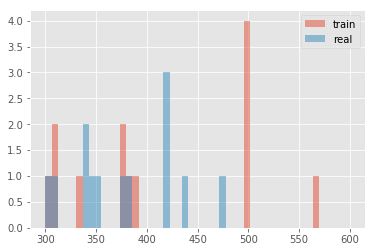

In [988]:
bins = np.linspace(300, 600, 50)

plt.hist(inputs_train['Duration Overall'], bins, alpha=0.5, label='train')
plt.hist(df_test['Duration Overall'], bins, alpha=0.5, label='real')
plt.legend(prop={'size': 10})
plt.show()

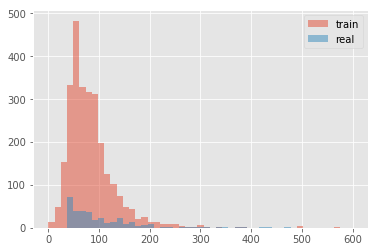

In [989]:
bins = np.linspace(0, 600, 50)

plt.hist(inputs_train['Duration Overall'], bins, alpha=0.5, label='train')
plt.hist(df_test['Duration Overall'], bins, alpha=0.5, label='real')
plt.legend(prop={'size': 10})
plt.show()

In [972]:
predict_array=rf.predict(df_test.drop(columns=['Bill Number','Deployment ID'])).astype('int')
predict=pd.DataFrame(predict_array,columns=['Overdue Days'])
final=pd.concat([df_test.reset_index(drop=True),predict], axis=1)

In [971]:
rf.predict(df_test.drop(columns=['Bill Number','Deployment ID'])).astype('int')

array([  1, -15,   1,   1,   1,   1,   1, -15,   1, -15, -15,   1,   1,
         1,   1,   1,   1, -15, -15,   1, -15,   1, -15,   1,   1,   1,
         1, -15,   1,   1,   1, -15, -15, -15, -15, -15,   1,   1,   1,
       -15,   1,   1, -15,   1,   1,   1,   1,   1,   1,   1,   1,   1,
       -15, -15,   1,   1,   1, -15,   1,   1, -15, -15, -15,   1,   1,
         1,   1, -15, -15,   1,   1,   1, -15, -15, -15,   1, -15,   1,
         1, -15, -15, -15,   1, -15,   1,   1,   1,   1,   1, -15,   1,
         1,   1,   1,   1,   1, -15, -15,   1,   1, -15,   1,   1, -15,
         1,   1,   1,   1, -15,   1, -15,   1,   1,   1,   1,   1, -15,
         1,   1,   1,   1,   1,   1,   1,   1,   1,   1, -15,   1,   1,
         1,   1,   1, -15, -15, -15,   1,   1, -15,   1,   1,   1,   1,
         1,   1,   1,   1,   1,   1,   1, -15,   1,   1,   1,   1,   1,
         1,   1,   1,   1,   1,   1, -15,   1,   1,   1,   1,   1,   1,
         1,   1,   1,   1,   1,   1,   1,   1,   1,   1,   1,   

In [974]:
final

,Bill Number,Deployment ID,Bookings Amount,Duration Overall,Seats,MRR,Workload Deployments,Package (group) durations,Deployment Consultant,SaaS Product,Account Status,Tier,Overdue,Account Industry,Overdue Days
0,INV00362902,a3S1Y000000QDb8UAG,7000.0,208.0,40.0,850.500,15.0,101.0,35,1,2,2,1,1,1
1,INV00375885,a3S1Y000000eFToUAM,5200.0,286.0,100.0,2000.000,16.0,87.0,40,1,4,0,1,18,-15
2,INV00370213,a3S1Y000000QE6SUAW,8100.0,174.0,60.0,2402.400,9.0,107.0,24,0,4,1,1,19,1
3,INV00357605,a3S1Y000000tbMUUAY,4000.0,241.0,50.0,1291.667,43.0,87.0,39,1,4,1,1,16,1
4,INV00393454,a3S1Y000000mUOyUAM,2000.0,47.0,20.0,600.000,14.0,76.5,32,2,1,1,0,15,1
5,INV00391705,a3S1Y000000mUHEUA2,2000.0,57.0,10.0,248.000,28.0,76.5,11,0,0,3,0,12,1
6,INV00366329,a3S1Y000000QDpKUAW,2500.0,195.0,15.0,300.000,1.0,76.5,26,1,2,3,1,13,1
7,INV00384542,a3S1Y000000mThqUAE,2000.0,96.0,150.0,4950.000,6.0,107.0,22,1,4,0,1,20,-15
8,INV00351053,a3S1Y000000HV9EUAW,3600.0,273.0,30.0,701.595,15.0,76.5,30,1,4,1,1,22,1
9,INV00393677,a3S1Y000000mUPwUAM,4500.0,47.0,140.0,4504.500,16.0,101.0,41,1,4,0,0,20,-15


In [30]:
final.to_csv(r'G:\My Drive\PS Model Automation\File Name.csv',index=False)

In [203]:
pd.DataFrame({'feature': data_inputs.drop(columns=['Bill Number','Deployment ID']).columns,
              'importance': rf.feature_importances_}).sort_values('importance', ascending=False)

,feature,importance
5,Overdue Days,0.564020
3,Overdue,0.130072
2,Package (group) durations,0.102446
0,Bookings Amount,0.082053
8,MRR,0.034863
7,Seats,0.024729
4,Workload Deployments,0.022645
1,Deployment Consultant,0.018005
10,Tier,0.008518
9,Account Status,0.006650


In [32]:
# import xgboost
# from sklearn import model_selection
# from sklearn.metrics import accuracy_score
# model = xgboost.XGBClassifier()
# model.fit(inputs_train.drop(columns=['Bill Number','Deployment ID']), expected_output_train)
# print(model)
# y_pred = model.predict(X_test)
# predictions = [round(value) for value in y_pred]
# # evaluate predictions
# accuracy = accuracy_score(y_test, predictions)
# print("Accuracy: %.2f%%" % (accuracy * 100.0))

In [33]:
# # make predictions for test data
# y_pred = model.predict(inputs_test.drop(columns=['Bill Number','Deployment ID']))
# predictions = [round(value) for value in y_pred]
# # evaluate predictions
# accuracy = accuracy_score(expected_output_test, predictions)
# print("Accuracy: %.2f%%" % (accuracy * 100.0))

In [34]:
# pd.DataFrame({'feature': data_inputs.drop(columns=['Bill Number','Deployment ID']).columns,
#               'importance': model.feature_importances_}).sort_values('importance', ascending=False)

In [529]:
traindf=dfo[dfo['Project Status'].isin(['Completed', 'Deemed Delivered'])].dropna()
traindf=traindf[traindf['Duration Days']<traindf['Duration Days (95 quantile)']]
testdf=dfo[dfo['Project Status'].isin(['Completed', 'Deemed Delivered']) == False].drop('Duration Days',axis=1).dropna()

feature_cols=['Bill Number','Deployment ID','Bookings Amount','Deployment Owner','Project Status',
              'Deployment Consultant','Package (group) durations',
              'Package Detailed','Overdue','Workload Deployments','Account Industry',
             'SaaS Product','Seats','MRR','Account Status','Tier','Days from Today']
data_inputs = traindf[feature_cols]
expected_output = traindf[['Duration Days']]
inputs_train, inputs_test, expected_output_train, expected_output_test = train_test_split(data_inputs, expected_output, test_size=0.1, random_state=42)
inputs_train.head()

,Bill Number,Deployment ID,Bookings Amount,Deployment Owner,Project Status,Deployment Consultant,Package (group) durations,Package Detailed,Overdue,Workload Deployments,Account Industry,SaaS Product,Seats,MRR,Account Status,Tier,Days from Today
3145,INV00377405,a3S1Y000000QEnMUAW,4000.0,Wndyr,Completed,Trey Sparks,87.0,Medium Deployment,T,39.0,Healthcare,Business,40.0,793.6,New,Tier 3,136.0
1982,INV00331661,a3S1Y000000eECmUAM,5600.0,Internal,Completed,Brett Bellon,107.0,Large Deployment,T,22.0,Other,Enterprise,120.0,2310.0,New,Tier 1,376.0
2613,INV00359891,a3S1Y000000tbaHUAQ,1000.0,Wndyr,Completed,Femi Ogunsola,45.0,JumpStart Deployment,F,37.0,Computer Software,Business,15.0,260.4,New,Tier 4,228.0
1722,INV00322958,a3S1Y000000eDKiUAM,1000.0,Wndyr,Completed,Trey Sparks,45.0,JumpStart Deployment,T,31.0,Government,Wrike for Marketers,5.0,173.0,New,Tier 5,424.0
47,INV00376054,a3S1Y000000QEdgUAG,2000.0,Wndyr,Completed,Andrew Lemon,76.5,Small Deployment,T,30.0,Marketing Agency,Business,20.0,547.2,Returning,Tier 2,143.0


In [531]:
from sklearn import preprocessing
from catboost import CatBoostClassifier, FeaturesData, Pool

le=preprocessing.LabelEncoder()
expected_output = le.fit_transform(expected_output_train)
feature_num=['Bookings Amount','Seats','MRR','Days from Today',
             'Workload Deployments','Package (group) durations']
feature_cat=['Deployment Owner', 'Project Status',
       'Deployment Consultant',
       'Package Detailed', 'SaaS Product',
       'Account Status', 'Tier', 'Overdue', 'Account Industry']
inputs_train[feature_num]=inputs_train[feature_num].astype('float32')
inputs_test[feature_num]=inputs_test[feature_num].astype('float32')
inputs_train[feature_cat]=inputs_train[feature_cat].astype('str')
inputs_test[feature_cat]=inputs_test[feature_cat].astype('str')
data=FeaturesData(
        num_feature_data=inputs_train[feature_num].values,
        cat_feature_data=inputs_train[feature_cat].values,
        num_feature_names=feature_num,
        cat_feature_names=feature_cat)

train_data = Pool(
    data=FeaturesData(
        num_feature_data=inputs_train[feature_num].values,
        cat_feature_data=inputs_train[feature_cat].values,
        num_feature_names=feature_num,
        cat_feature_names=feature_cat),
    label=expected_output_train
)
test_data = Pool(
    data=FeaturesData(
        num_feature_data=inputs_test[feature_num].values,
        cat_feature_data=inputs_test[feature_cat].values,
        num_feature_names=feature_num,
        cat_feature_names=feature_cat),
    label=expected_output_test
)

/opt/3rd/python/3/lib/python3.6/site-packages/sklearn/preprocessing/label.py:235: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [533]:
model = CatBoostRegressor(iterations=800, learning_rate=1, depth=10)
# Fit model
model.fit(train_data,plot=True,eval_set=test_data)
# Get predicted classes
preds_class = model.predict(test_data)

MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

0:	learn: 23.4093194	test: 22.6802078	best: 22.6802078 (0)	total: 26.3ms	remaining: 21s
1:	learn: 21.3710801	test: 20.7560465	best: 20.7560465 (1)	total: 166ms	remaining: 1m 6s
2:	learn: 21.0276384	test: 21.0703871	best: 20.7560465 (1)	total: 195ms	remaining: 51.8s
3:	learn: 20.9639509	test: 20.9842004	best: 20.7560465 (1)	total: 212ms	remaining: 42.3s
4:	learn: 20.4646874	test: 20.4420773	best: 20.4420773 (4)	total: 260ms	remaining: 41.4s
5:	learn: 20.4391459	test: 20.4467107	best: 20.4420773 (4)	total: 273ms	remaining: 36.1s
6:	learn: 20.3774637	test: 20.5586876	best: 20.4420773 (4)	total: 294ms	remaining: 33.3s
7:	learn: 20.3771881	test: 20.5611543	best: 20.4420773 (4)	total: 307ms	remaining: 30.4s
8:	learn: 19.6199283	test: 20.9637067	best: 20.4420773 (4)	total: 383ms	remaining: 33.6s
9:	learn: 19.6024687	test: 20.9081013	best: 20.4420773 (4)	total: 397ms	remaining: 31.4s
10:	learn: 19.3138661	test: 21.2974033	best: 20.4420773 (4)	total: 513ms	remaining: 36.8s
11:	learn: 19.0514717

92:	learn: 15.1734635	test: 22.8617041	best: 20.4420773 (4)	total: 7.07s	remaining: 53.7s
93:	learn: 15.1691724	test: 22.8669565	best: 20.4420773 (4)	total: 7.15s	remaining: 53.7s
94:	learn: 15.1545015	test: 22.8794828	best: 20.4420773 (4)	total: 7.21s	remaining: 53.5s
95:	learn: 15.0666238	test: 22.8868624	best: 20.4420773 (4)	total: 7.28s	remaining: 53.4s
96:	learn: 14.9032126	test: 23.1054233	best: 20.4420773 (4)	total: 7.36s	remaining: 53.3s
97:	learn: 14.8816890	test: 23.1744559	best: 20.4420773 (4)	total: 7.44s	remaining: 53.3s
98:	learn: 14.8232687	test: 23.2321796	best: 20.4420773 (4)	total: 7.51s	remaining: 53.2s
99:	learn: 14.7224804	test: 23.1184913	best: 20.4420773 (4)	total: 7.59s	remaining: 53.1s
100:	learn: 14.6677526	test: 23.1811953	best: 20.4420773 (4)	total: 7.67s	remaining: 53.1s
101:	learn: 14.6544433	test: 23.1982154	best: 20.4420773 (4)	total: 7.74s	remaining: 53s
102:	learn: 14.6280314	test: 23.2230152	best: 20.4420773 (4)	total: 7.81s	remaining: 52.9s
103:	lear

185:	learn: 13.3915777	test: 23.0395812	best: 20.4420773 (4)	total: 14.1s	remaining: 46.5s
186:	learn: 13.3401983	test: 23.0472137	best: 20.4420773 (4)	total: 14.2s	remaining: 46.5s
187:	learn: 13.3349849	test: 23.0090584	best: 20.4420773 (4)	total: 14.3s	remaining: 46.4s
188:	learn: 13.3337971	test: 23.0065218	best: 20.4420773 (4)	total: 14.3s	remaining: 46.3s
189:	learn: 13.3309474	test: 23.0224313	best: 20.4420773 (4)	total: 14.4s	remaining: 46.2s
190:	learn: 13.3297649	test: 23.0184288	best: 20.4420773 (4)	total: 14.5s	remaining: 46.2s
191:	learn: 13.3287820	test: 23.0223996	best: 20.4420773 (4)	total: 14.6s	remaining: 46.1s
192:	learn: 13.3255315	test: 23.0111483	best: 20.4420773 (4)	total: 14.6s	remaining: 46s
193:	learn: 13.3052433	test: 22.9928786	best: 20.4420773 (4)	total: 14.7s	remaining: 46s
194:	learn: 13.3000083	test: 23.0025244	best: 20.4420773 (4)	total: 14.8s	remaining: 46s
195:	learn: 13.2955522	test: 22.9775663	best: 20.4420773 (4)	total: 14.9s	remaining: 45.9s
196:	

278:	learn: 12.4412294	test: 22.7506828	best: 20.4420773 (4)	total: 21.7s	remaining: 40.4s
279:	learn: 12.4137953	test: 22.8142358	best: 20.4420773 (4)	total: 21.7s	remaining: 40.4s
280:	learn: 12.4130981	test: 22.8159439	best: 20.4420773 (4)	total: 21.8s	remaining: 40.3s
281:	learn: 12.4108822	test: 22.8088265	best: 20.4420773 (4)	total: 21.9s	remaining: 40.3s
282:	learn: 12.4065016	test: 22.8012144	best: 20.4420773 (4)	total: 22s	remaining: 40.2s
283:	learn: 12.4036515	test: 22.7852715	best: 20.4420773 (4)	total: 22.1s	remaining: 40.2s
284:	learn: 12.4030353	test: 22.8052794	best: 20.4420773 (4)	total: 22.2s	remaining: 40.1s
285:	learn: 12.3885238	test: 22.7919515	best: 20.4420773 (4)	total: 22.3s	remaining: 40s
286:	learn: 12.3874213	test: 22.7960262	best: 20.4420773 (4)	total: 22.4s	remaining: 40s
287:	learn: 12.3423953	test: 22.7259376	best: 20.4420773 (4)	total: 22.5s	remaining: 39.9s
288:	learn: 12.3410458	test: 22.7109113	best: 20.4420773 (4)	total: 22.5s	remaining: 39.9s
289:	

371:	learn: 11.6145132	test: 22.9150458	best: 20.4420773 (4)	total: 29.4s	remaining: 33.8s
372:	learn: 11.6139673	test: 22.9177245	best: 20.4420773 (4)	total: 29.5s	remaining: 33.8s
373:	learn: 11.5988015	test: 22.9331194	best: 20.4420773 (4)	total: 29.6s	remaining: 33.7s
374:	learn: 11.5897945	test: 22.9632575	best: 20.4420773 (4)	total: 29.7s	remaining: 33.6s
375:	learn: 11.5855708	test: 22.9720263	best: 20.4420773 (4)	total: 29.7s	remaining: 33.5s
376:	learn: 11.5787913	test: 22.9399160	best: 20.4420773 (4)	total: 29.8s	remaining: 33.5s
377:	learn: 11.5773935	test: 22.9307931	best: 20.4420773 (4)	total: 29.9s	remaining: 33.4s
378:	learn: 11.5770453	test: 22.9277300	best: 20.4420773 (4)	total: 29.9s	remaining: 33.2s
379:	learn: 11.5769316	test: 22.9272862	best: 20.4420773 (4)	total: 30s	remaining: 33.2s
380:	learn: 11.5763652	test: 22.9267306	best: 20.4420773 (4)	total: 30.1s	remaining: 33.1s
381:	learn: 11.5750068	test: 22.9325951	best: 20.4420773 (4)	total: 30.1s	remaining: 33s
382

464:	learn: 10.9302677	test: 23.4457996	best: 20.4420773 (4)	total: 36.9s	remaining: 26.6s
465:	learn: 10.9283003	test: 23.4317995	best: 20.4420773 (4)	total: 37s	remaining: 26.5s
466:	learn: 10.9011515	test: 23.4383982	best: 20.4420773 (4)	total: 37.1s	remaining: 26.4s
467:	learn: 10.8265393	test: 23.3894574	best: 20.4420773 (4)	total: 37.2s	remaining: 26.4s
468:	learn: 10.7901838	test: 23.4264697	best: 20.4420773 (4)	total: 37.2s	remaining: 26.3s
469:	learn: 10.6848496	test: 23.5295058	best: 20.4420773 (4)	total: 37.3s	remaining: 26.2s
470:	learn: 10.6352873	test: 23.4714484	best: 20.4420773 (4)	total: 37.4s	remaining: 26.1s
471:	learn: 10.6123345	test: 23.5613639	best: 20.4420773 (4)	total: 37.4s	remaining: 26s
472:	learn: 10.6109939	test: 23.5766320	best: 20.4420773 (4)	total: 37.5s	remaining: 25.9s
473:	learn: 10.6097807	test: 23.5816615	best: 20.4420773 (4)	total: 37.6s	remaining: 25.9s
474:	learn: 10.5898395	test: 23.5833408	best: 20.4420773 (4)	total: 37.7s	remaining: 25.8s
475

555:	learn: 9.8351432	test: 23.8061725	best: 20.4420773 (4)	total: 44.1s	remaining: 19.4s
556:	learn: 9.8272815	test: 23.8426071	best: 20.4420773 (4)	total: 44.2s	remaining: 19.3s
557:	learn: 9.8238770	test: 23.8381782	best: 20.4420773 (4)	total: 44.3s	remaining: 19.2s
558:	learn: 9.8193549	test: 23.8164490	best: 20.4420773 (4)	total: 44.4s	remaining: 19.1s
559:	learn: 9.8190417	test: 23.8179256	best: 20.4420773 (4)	total: 44.5s	remaining: 19.1s
560:	learn: 9.8180164	test: 23.8242371	best: 20.4420773 (4)	total: 44.5s	remaining: 19s
561:	learn: 9.8086482	test: 23.8344592	best: 20.4420773 (4)	total: 44.6s	remaining: 18.9s
562:	learn: 9.8075297	test: 23.8376443	best: 20.4420773 (4)	total: 44.7s	remaining: 18.8s
563:	learn: 9.8052014	test: 23.8418766	best: 20.4420773 (4)	total: 44.8s	remaining: 18.7s
564:	learn: 9.8022131	test: 23.8418190	best: 20.4420773 (4)	total: 44.9s	remaining: 18.7s
565:	learn: 9.8016101	test: 23.8443490	best: 20.4420773 (4)	total: 45s	remaining: 18.6s
566:	learn: 9.

647:	learn: 9.3727473	test: 23.8609666	best: 20.4420773 (4)	total: 51.6s	remaining: 12.1s
648:	learn: 9.3724683	test: 23.8674874	best: 20.4420773 (4)	total: 51.7s	remaining: 12s
649:	learn: 9.3713344	test: 23.8741731	best: 20.4420773 (4)	total: 51.8s	remaining: 11.9s
650:	learn: 9.3677489	test: 23.8434028	best: 20.4420773 (4)	total: 51.9s	remaining: 11.9s
651:	learn: 9.3603574	test: 23.8763665	best: 20.4420773 (4)	total: 52s	remaining: 11.8s
652:	learn: 9.3593372	test: 23.8724145	best: 20.4420773 (4)	total: 52.1s	remaining: 11.7s
653:	learn: 9.3583410	test: 23.8723781	best: 20.4420773 (4)	total: 52.1s	remaining: 11.6s
654:	learn: 9.3581449	test: 23.8743596	best: 20.4420773 (4)	total: 52.2s	remaining: 11.6s
655:	learn: 9.3574328	test: 23.8876774	best: 20.4420773 (4)	total: 52.3s	remaining: 11.5s
656:	learn: 9.3514018	test: 23.8971130	best: 20.4420773 (4)	total: 52.3s	remaining: 11.4s
657:	learn: 9.3501943	test: 23.9040481	best: 20.4420773 (4)	total: 52.4s	remaining: 11.3s
658:	learn: 9.

739:	learn: 8.8696726	test: 24.0180340	best: 20.4420773 (4)	total: 59.1s	remaining: 4.79s
740:	learn: 8.8694711	test: 24.0231993	best: 20.4420773 (4)	total: 59.2s	remaining: 4.71s
741:	learn: 8.8559243	test: 24.0265649	best: 20.4420773 (4)	total: 59.3s	remaining: 4.63s
742:	learn: 8.8359171	test: 24.0285135	best: 20.4420773 (4)	total: 59.4s	remaining: 4.55s
743:	learn: 8.8321886	test: 24.0240400	best: 20.4420773 (4)	total: 59.5s	remaining: 4.47s
744:	learn: 8.8228406	test: 24.0352596	best: 20.4420773 (4)	total: 59.5s	remaining: 4.39s
745:	learn: 8.7932334	test: 24.0474613	best: 20.4420773 (4)	total: 59.6s	remaining: 4.31s
746:	learn: 8.7836671	test: 24.0332182	best: 20.4420773 (4)	total: 59.7s	remaining: 4.23s
747:	learn: 8.7789808	test: 24.0328682	best: 20.4420773 (4)	total: 59.8s	remaining: 4.15s
748:	learn: 8.7769736	test: 24.0286160	best: 20.4420773 (4)	total: 59.8s	remaining: 4.07s
749:	learn: 8.7763915	test: 24.0274211	best: 20.4420773 (4)	total: 59.9s	remaining: 4s
750:	learn: 8

In [534]:
print ("test_score: {0:.2f}, train_score: {1:.2f}".format(model.score(test_data),model.score(train_data)))

test_score: 20.44, train_score: 20.80


In [535]:
print(round(model.eval_metrics(test_data, metrics=['R2'])['R2'][-1],4))

0.6103


In [536]:
pd.DataFrame({'feature': model.feature_names_,
              'importance': np.round(model.get_feature_importance(train_data),1)}).sort_values('importance', ascending=False)

Dataset is provided, but PredictionValuesChange feature importance don't use it, since non-empty LeafWeights in model.


,feature,importance
13,Overdue,76.7
2,MRR,8.2
0,Bookings Amount,6.5
5,Package (group) durations,2.6
11,Account Status,2.4
9,Package Detailed,1.5
4,Workload Deployments,0.8
8,Deployment Consultant,0.7
6,Deployment Owner,0.5
10,SaaS Product,0.1


In [36]:
# cat_model.score(inputs_test.drop(columns=['Bill Number','Deployment ID']), expected_output_test)

In [37]:
# pd.DataFrame({'feature': data_inputs.drop(columns=['Bill Number','Deployment ID']).columns,
#               'importance': cat_model.get_feature_importance()}).sort_values('importance', ascending=False)